<a href="https://colab.research.google.com/github/preetanam123/DataAnalysisNetflix/blob/main/AnalysingNetflixDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt



In [ ]:
# df = pd.read_csv('/content/8. Netflix Dataset.csv')
df = pd.read_csv('/content/NetflixDataset.csv')
df.head()

In [4]:
df.shape


(7789, 11)

In [ ]:
df.describe()

In [ ]:
df.tail()

In [8]:
df.size

85679

In [10]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [11]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Task 1: Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [ ]:
df.head()

In [14]:
df.shape

(7789, 11)

In [ ]:
df[df.duplicated()]

In [20]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(7787, 11)

In [ ]:
df[df.duplicated()]

Task 2: Is there any Null Value present in any column ? Show with Heat-map.

In [24]:
[df.isnull()]

[      Show_Id  Category  Title  Director   Cast  Country  Release_Date  \
 0       False     False  False      True  False    False         False   
 1       False     False  False     False  False    False         False   
 2       False     False  False     False  False    False         False   
 3       False     False  False     False  False    False         False   
 4       False     False  False     False  False    False         False   
 ...       ...       ...    ...       ...    ...      ...           ...   
 7784    False     False  False     False  False    False         False   
 7785    False     False  False     False  False    False         False   
 7786    False     False  False      True  False     True         False   
 7787    False     False  False      True  False    False         False   
 7788    False     False  False     False   True    False         False   
 
       Rating  Duration   Type  Description  
 0      False     False  False        False  
 1    

In [25]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

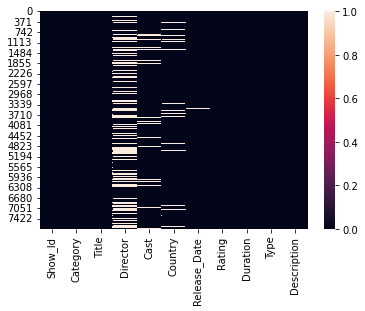

In [27]:
sb.heatmap(df.isnull()) #null values in white

Q 1. For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [36]:
df[df['Title'].isin( ['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [32]:
row = (df['Title'] == 'House of Cards')

df[row]['Show_Id']
df[row]['Director']


2832    Robin Wright, David Fincher, Gerald McRaney, J...
Name: Director, dtype: object

Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.


In [37]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [38]:
df['Date_N'] = pd.to_datetime(df['Release_Date'])

In [ ]:
df.head()

In [40]:
df.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
Date_N          datetime64[ns]
dtype: object

In [ ]:
df['Date_N'].dt.year.value_counts()

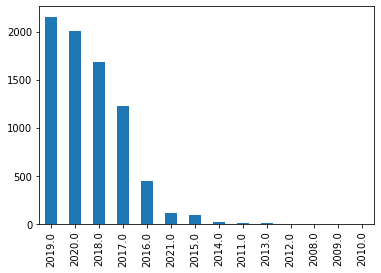

In [45]:
#bargraph
df['Date_N'].dt.year.value_counts().plot(kind='bar')

Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.


In [51]:
mov = df[df['Category'] == "Movie"].count()

Show_Id         5377
Category        5377
Title           5377
Director        5214
Cast            4951
Country         5147
Release_Date    5377
Rating          5372
Duration        5377
Type            5377
Description     5377
Date_N          5377
dtype: int64

In [52]:
tv = df[df['Category'] == "TV Show"].count()

Show_Id         2410
Category        2410
Title           2410
Director         185
Cast            2118
Country         2133
Release_Date    2400
Rating          2408
Duration        2410
Type            2410
Description     2410
Date_N          2400
dtype: int64

In [53]:
df.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


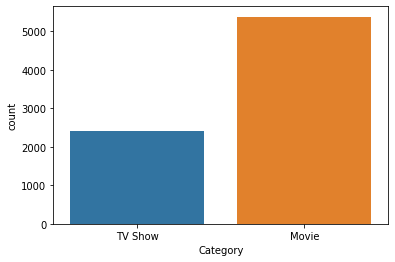

In [54]:
sb.countplot(df['Category'])

Q. 4) Show all the Movies that were released in year 2000.


In [57]:
df['Year'] = df['Date_N'].dt.year

In [ ]:
df.head()

In [ ]:
df[ (df['Category']=='Movie') & (df['Year'] == 2020 ) ]

Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [ ]:
df.head()

In [ ]:
df[ (df['Category'] == 'TV Show') & (df['Country'] == 'India')]['Title']

Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [ ]:
df.head()

In [74]:
max((df.groupby('Director').Category.count()))

18

In [75]:
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [ ]:
df [ (df['Category'] == 'Movie') & (df['Type'] == 'Comedies') | (df['Country'] == 'United Kingdom')]

Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [ ]:
df.head()

In [83]:
df=df.dropna()

In [87]:
df[df['Cast'].str.contains('Tom Cruise')].count()

Show_Id         2
Category        2
Title           2
Director        2
Cast            2
Country         2
Release_Date    2
Rating          2
Duration        2
Type            2
Description     2
Date_N          2
Year            2
dtype: int64

Q. 9) What are the different Ratings defined by Netflix ?

In [89]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0


In [90]:
df.groupby('Rating').Category.count()

Rating
G             38
NC-17          2
NR            62
PG           238
PG-13        375
R            654
TV-14       1133
TV-G          80
TV-MA       1666
TV-PG        413
TV-Y          71
TV-Y7         69
TV-Y7-FV       3
UR             5
Name: Category, dtype: int64

Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?


Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [91]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0


In [97]:
df [ (df['Category'] == 'Movie') & (df['Rating'] == 'TV-14') & (df['Country'] == 'Canada') ].shape

(9, 13)

In [100]:
df [ (df['Category'] == 'Movie') & (df['Rating'] == 'TV-14')].shape

(1098, 13)

In [101]:
df [(df['Category'] == "TV Show") & (df['Rating'] == 'R') & (df['Year'] > 2018)].shape


(0, 13)

Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [103]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0


In [107]:
df.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
Date_N          datetime64[ns]
Year                   float64
dtype: object

In [108]:
df.Duration.dtype

dtype('O')

In [129]:
df[['Minutes/Seasons','Units']]=df['Duration'].str.split(' ',expand=True)

In [ ]:
df.dropna(inplace=True)
df

In [138]:
df['Minutes/Seasons'].astype='float'

In [141]:
[df['Minutes/Seasons'].max()]


['99']

In [ ]:
df[df['Minutes/Seasons'] == '99']

Q. 11) Which individual country has the Highest No. of TV Shows ?

In [148]:
dtv=df[df['Category'] == 'TV Show']

In [ ]:
dtv.head(2)

In [ ]:
dtv

In [ ]:
dtv.Country.value_counts()

In [151]:
dtv.Country.value_counts().head(1)

United States    27
Name: Country, dtype: int64

Q. 12) How can we sort the dataset by Year ?

In [156]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year,Minutes,Units,Minutes/Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min,78


In [159]:
df.sort_values(by="Year", ascending=False, inplace=True)

In [161]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year,Minutes,Units,Minutes/Seasons
2269,s2270,Movie,Fred Claus,David Dobkin,"Vince Vaughn, Paul Giamatti, John Michael Higg...",United States,"January 1, 2021",PG,115 min,"Children & Family Movies, Comedies",The holiday season is ruined for Santa Claus w...,2021-01-01,2021.0,115,min,115
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,"January 8, 2021",TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so...",2021-01-08,2021.0,148,min,148


Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [162]:
df[ ((df['Category'] == 'Movie') & (df['Type'] == 'Drama')) | ((df['Category'] == 'TV Show') & (df['Type'] == "Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year,Minutes,Units,Minutes/Seasons
6204,s6204,TV Show,The Cat in the Hat Knows a Lot About That!,Tony Collingwood,"Martin Short, Alexa Torrington, Jacob Ewaniuk,...","Canada, United Kingdom, United States","January 1, 2021",TV-Y,1 Season,Kids' TV,"The Cat in the Hat is back – and this time, he...",2021-01-01,2021.0,1,Season,1
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,2020.0,1,Season,1
3582,s3583,TV Show,Lego Friends: Girls on a Mission,"Andrew Tan, Stephen Murray","Jasmine St. Clair, Allegra Clark, Rosamund Mar...",Denmark,"February 1, 2019",TV-Y,1 Season,Kids' TV,"Five best friends put their teamwork, wits and...",2019-02-01,2019.0,1,Season,1
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017-06-16,2017.0,2,Seasons,2
